In [157]:
## reload all modules before running them
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Prediction

In [1]:
import yfinance as yf
# import requests_cache
# session = requests_cache.CachedSession('yfinance.cache')
# session.headers['User-agent'] = 'my-program/1.0'
tickers = yf.download('nvda', '2023-1-1', '2023-12-31', group_by='ticker')
# The scraped response will be stored in the cache


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [1]:
from StockModel import StockModel

sm = StockModel('NVDA')
sm.start_date = '2023-1-1'
sm.end_date = '2023-12-31'
sm.load_historical_data()

!! Loading Ticker NVDA: 2023-1-1 - 2023-12-31 !!
Loaded history data of ticker [NVDA]


### test LSTMSelectStock

In [81]:
import importlib
import select_stock
from select_stock import LSTMSelectStock
from stockDefine import StockFeature
importlib.reload(select_stock)

sf = StockFeature()
ss = LSTMSelectStock(sm, sf.get_features())
ss.preprocess_data()

Processing ticker: NVDA with features: ['Open-Close Difference', 'High-Low Difference', 'Close-Low Difference', 'Close-High Difference', 'Average Price', 'Volume Change', 'MA 5', 'MA 20', 'RSI', 'MACD', 'Volume MA 5', 'Price Volume Ratio', 'PE', 'PB', 'Volume']


/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#### Test train model

In [84]:
ss.train_model()

Epoch 1/50


/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7145 - loss: 0.6929 - val_accuracy: 0.8000 - val_loss: 0.6918
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7522 - loss: 0.6918 - val_accuracy: 0.8000 - val_loss: 0.6905
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7396 - loss: 0.6909 - val_accuracy: 0.8000 - val_loss: 0.6893
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7392 - loss: 0.6899 - val_accuracy: 0.8000 - val_loss: 0.6880
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7362 - loss: 0.6889 - val_accuracy: 0.8000 - val_loss: 0.6867
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7652 - loss: 0.6873 - val_accuracy: 0.8000 - val_loss: 0.6854
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6967 - loss: 0.6879 - val_accuracy: 0.8000 - val_loss: 0.6841
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7114 - loss: 0.6866 - val_accuracy: 0.8000 - val_loss: 0.6828
Epoch 9/50


### Test ModelIO

In [147]:
import importlib
import ModelIO
from ModelIO import ModelSaverLoader
## only one module is reload
importlib.reload(ModelIO)
mio = ModelSaverLoader('models', sm.ticker_symbol)

save function name: _save_model
save function name: _save_scaler
save function name: _save_parameters
save function name: _save_train_history
save function name: _save_readme
save function name: _save_performance
save function name: _save_model_summary


In [128]:
from stockDefine import MODEL_TRAIN_DATA
mio.set_model_train_data(MODEL_TRAIN_DATA.model, sm.model)
mio.set_model_train_data(MODEL_TRAIN_DATA.scaler, ss.scaler)
mio.set_model_train_data(MODEL_TRAIN_DATA.parameters, ss.create_model_parameters())
readme = mio.create_readme()
mio.set_model_train_data(MODEL_TRAIN_DATA.readme, readme)
mio.set_model_train_data(MODEL_TRAIN_DATA.train_history, ss.train_history)
mio.set_model_train_data(MODEL_TRAIN_DATA.performance, ss.performance)
mio.set_model_train_data(MODEL_TRAIN_DATA.model_summary, ss.get_model_summary())

#print(mio._model_train_data[MODEL_TRAIN_DATA.model_summary])
#print(mio._model_train_data[MODEL_TRAIN_DATA.train_history].history.keys())

#### Test IO functions

In [129]:

print(mio._directory)
mio.save_train_data()

models/NVDA_20260126_140850
Saving data model ...
✓ 模型已保存至: models/NVDA_20260126_140850/NVDA_model.h5
Saving data scaler ...
✓ Scaler已保存至: models/NVDA_20260126_140850/scaler.pkl
Saving data parameters ...
✓ 参数已保存至: models/NVDA_20260126_140850/params.json
Saving data train_history ...
✓ 训练历史已完整保存至: models/NVDA_20260126_140850/history.pkl
Saving data readme ...
✓ README已保存至: models/NVDA_20260126_140850/README.md
Saving data performance ...
✓ 评估表现已保存至: models/NVDA_20260126_140850/performance.json
Saving data model_summary ...
✓ 模型总览已保存至: models/NVDA_20260126_140850/model_summary.txt


In [130]:
mio.save_model_mode = False
#mio.load_train_data(MODEL_TRAIN_DATA.readme)
#print(mio.get_model_train_data(MODEL_TRAIN_DATA.readme))

load function name: _load_model
load function name: _load_scaler
load function name: _load_parameters
load function name: _load_train_history
load function name: _load_readme
load function name: _load_performance
load function name: _load_model_summary


#### analyse history

/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✓ 训练历史已加载: models/NVDA_20260126_140850/history.pkl


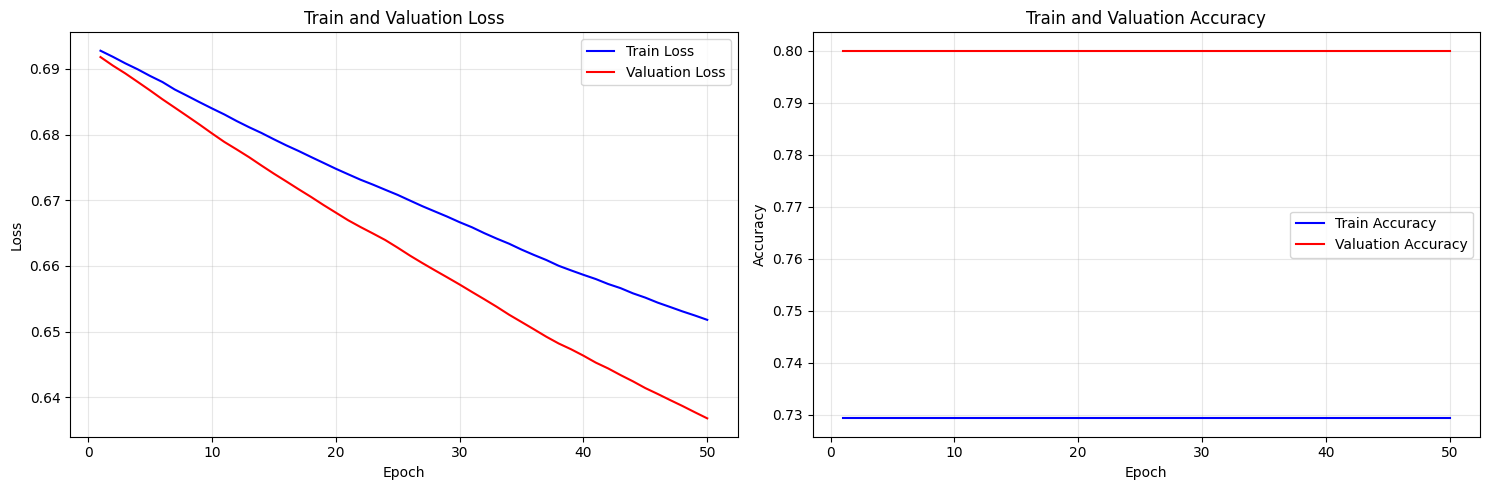

In [131]:
import train_history_analyser
import importlib
importlib.reload(train_history_analyser)
mio.load_train_data(MODEL_TRAIN_DATA.train_history)
tha = train_history_analyser.TrainHistoryAnalyser(sm.ticker_symbol, 
                                                  mio.get_model_train_data(MODEL_TRAIN_DATA.train_history))
# tha.inspect_history()
# tha.analyze_training_performance()
tha.plot_training_history()

### Test TickerManager

#### start with loading data from yfinance

In [9]:
import TickerManager
import importlib
importlib.reload(TickerManager)

tm = TickerManager.TickerManager('2024-01-01', '2024-12-31')
tm.add_ticker('TSLA')
tm.add_ticker('MSFT')
tm.load_ticker_data()
# save model
sm0 = tm.get_stock_model(0)
mio_sm0 = ModelIO.ModelSaverLoader('models', sm0.ticker_symbol)
mio_sm0.set_model_train_data(MODEL_TRAIN_DATA.stock_data, tm.get_stock_model(sm0.ticker_symbol).loaded_data)
#print(mio_sm0.get_model_train_data(MODEL_TRAIN_DATA.stock_data).head())
mio_sm0.save_train_data(MODEL_TRAIN_DATA.stock_data)
sm1 = tm.get_stock_model(1)
mio_sm1 = ModelIO.ModelSaverLoader('models', sm1.ticker_symbol)
mio_sm1.set_model_train_data(MODEL_TRAIN_DATA.stock_data, tm.get_stock_model(sm1.ticker_symbol).loaded_data)
mio_sm1.save_train_data(MODEL_TRAIN_DATA.stock_data)

Adding Stock: [TSLA]
Adding Stock: [MSFT]
开始下载 2 个股票的数据...
下载参数: start=2024-01-01, end=2024-12-31


[*********************100%***********************]  2 of 2 completed

下载完成，数据形状: (251, 10)
Adding Stock: [TSLA]
TSLA: 成功加载 251 条数据
Adding Stock: [MSFT]
MSFT: 成功加载 251 条数据

下载完成: 2/2 个股票数据下载成功
save function name: _save_stock_data
save function name: _save_model
save function name: _save_scaler
save function name: _save_parameters
save function name: _save_readme
save function name: _save_train_history
save function name: _save_performance
save function name: _save_model_summary
✓ 原始数据已保存至: models/TSLA_20260126_193100/stock_data.csv
save function name: _save_stock_data
save function name: _save_model
save function name: _save_scaler
save function name: _save_parameters
save function name: _save_readme
save function name: _save_train_history
save function name: _save_performance
save function name: _save_model_summary
✓ 原始数据已保存至: models/MSFT_20260126_193100/stock_data.csv


In [12]:
import TickerManager
from stockDefine import MODEL_TRAIN_DATA
from stockDefine import StockFeature
method = 1
sf = StockFeature()
if method == 0:
    import importlib
    importlib.reload(TickerManager)
    import ModelIO
    importlib.reload(ModelIO)

    saved_stock0_data_path = r'./models/TSLA_20260126_193100/stock_data.csv'
    saved_stock1_data_path = r'./models/MSFT_20260126_193100/stock_data.csv'

    tm = TickerManager.TickerManager('2024-01-01', '2024-12-31')
    tm.add_ticker('TSLA')
    tm.add_ticker('MSFT')
else:
    tm.stock_features = sf.get_features()
    tm.process_select_stocks()

Processing ticker: TSLA with features: ['Open-Close Difference', 'High-Low Difference', 'Close-Low Difference', 'Close-High Difference', 'Average Price', 'Volume Change', 'MA 5', 'MA 20', 'RSI', 'MACD', 'Volume MA 5', 'Price Volume Ratio', 'PE', 'PB', 'Volume']


/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
E0000 00:00:1769452767.402384    2198 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1769452767.407933    2198 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed proper

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7098 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6942 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7011 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7267 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7215 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6963 - loss: nan - val_accuracy: 0.6667 - val_loss: nan
!! Complete Model Training !!
!! Evaluate Model !!
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
{'-9223372036854775808': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19.0}, '1': {'precision': 0.0, 'rec

/home/pyuan/MLProjects/stock-ai/select_stock.py:217: RuntimeWarning: invalid value encountered in cast
  y_pred = (model.predict(x_test)).astype(int)


Epoch 1/50


/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/pyuan/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9544 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9704 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9770 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9683 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9730 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9691 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
!! Complete Model Training !!
!! Evaluate Model !!
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
{'-9223372036854775808': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 38.0}, 'accuracy': 0.0, 'macro avg': {'precisi

/home/pyuan/MLProjects/stock-ai/select_stock.py:217: RuntimeWarning: invalid value encountered in cast
  y_pred = (model.predict(x_test)).astype(int)


#### save all data on the disk